In [103]:
# import tabulate
# a32 = np.array([[1,2],[3,4],[5,6]])
# a31 = np.array([[10],[20],[30]])
# a12 = np.array([[100,200]])

# print(tabulate.tabulate(a32, tablefmt='simple_grid'))
# print(tabulate.tabulate(a31, tablefmt='simple_grid'))
# print(tabulate.tabulate(a12, tablefmt='simple_grid'))
# print(tabulate.tabulate(a32 + a31, tablefmt='simple_grid'))
# print(tabulate.tabulate(a32 + a12, tablefmt='simple_grid'))

# 03_04: Doing math with NumPy arrays

In [2]:
import math
import collections
import dataclasses
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

NumPy is very, very good at math. While interpreted languages such as Python have a reputation of being slow, we can do math _very_ fast in Python as long as we write code that operates on _entire_ arrays. That's because the loops that are needed to perform math over the array are then implemented in compiled C within the NumPy library.

How can we do math with arrays? Let's start by creating a one-dimensional vector of equally spaced real values between, say, 0 and 5 times pi.

In [54]:
x = np.linspace(0.0, 5.0*math.pi, 128)  # extrema are included!

In [14]:
x

array([ 0.        ,  0.12368475,  0.2473695 ,  0.37105425,  0.494739  ,
        0.61842375,  0.7421085 ,  0.86579325,  0.989478  ,  1.11316275,
        1.2368475 ,  1.36053225,  1.484217  ,  1.60790175,  1.7315865 ,
        1.85527125,  1.978956  ,  2.10264075,  2.2263255 ,  2.35001025,
        2.473695  ,  2.59737975,  2.7210645 ,  2.84474925,  2.968434  ,
        3.09211875,  3.2158035 ,  3.33948825,  3.463173  ,  3.58685775,
        3.7105425 ,  3.83422725,  3.957912  ,  4.08159675,  4.2052815 ,
        4.32896625,  4.45265101,  4.57633576,  4.70002051,  4.82370526,
        4.94739001,  5.07107476,  5.19475951,  5.31844426,  5.44212901,
        5.56581376,  5.68949851,  5.81318326,  5.93686801,  6.06055276,
        6.18423751,  6.30792226,  6.43160701,  6.55529176,  6.67897651,
        6.80266126,  6.92634601,  7.05003076,  7.17371551,  7.29740026,
        7.42108501,  7.54476976,  7.66845451,  7.79213926,  7.91582401,
        8.03950876,  8.16319351,  8.28687826,  8.41056301,  8.53

We wish to compute _sine_ of all these values. The regular function from the math library won't do it:

In [15]:
math.sin(x)

TypeError: only length-1 arrays can be converted to Python scalars

Instead we use the NumPy function of the same name.

In [16]:
sinx = np.sin(x)

The result is another numpy array, with the same shape as x.

In [17]:
sinx

array([ 0.00000000e+00,  1.23369638e-01,  2.44854382e-01,  3.62598137e-01,
        4.74801964e-01,  5.79751564e-01,  6.75843473e-01,  7.61609559e-01,
        8.35739449e-01,  8.97100557e-01,  9.44755382e-01,  9.77975832e-01,
        9.96254351e-01,  9.99311673e-01,  9.87101086e-01,  9.59809149e-01,
        9.17852840e-01,  8.61873185e-01,  7.92725465e-01,  7.11466148e-01,
        6.19336749e-01,  5.17744860e-01,  4.08242645e-01,  2.92503125e-01,
        1.72294617e-01,  4.94537199e-02, -7.41427526e-02, -1.96606441e-01,
       -3.16066292e-01, -4.30697148e-01, -5.38747630e-01, -6.38566896e-01,
       -7.28629866e-01, -8.07560519e-01, -8.74152919e-01, -9.27389639e-01,
       -9.66457306e-01, -9.90759028e-01, -9.99923511e-01, -9.93810738e-01,
       -9.72514103e-01, -9.36358983e-01, -8.85897772e-01, -8.21901439e-01,
       -7.45347746e-01, -6.57406313e-01, -5.59420747e-01, -4.52888114e-01,
       -3.39436063e-01, -2.20797963e-01, -9.87864183e-02,  2.47344273e-02,
        1.47877370e-01,  

NumPy has a function for pretty much everything you can find in the standard `math` library. These functions are known as _universal functions_, and they operate element-wise across entire arrays. They include arithmetics, logical operations, trigonometry and hyperbolic functions, exponentials and logarithms, checking for infinity and not-a-number, rounding, and more. 

If we give two vectors to matplotlib, it will plot them together as a function, using them for the x and y values respectively. The y range is set automatically.

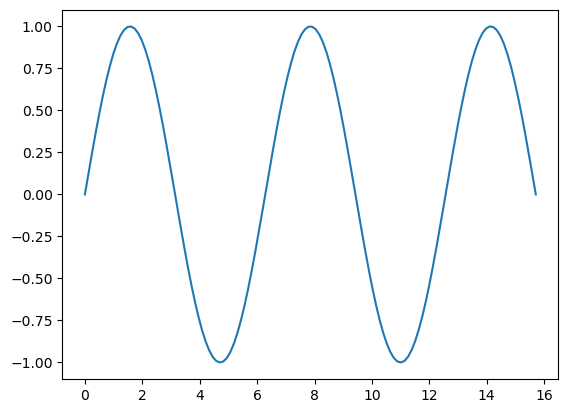

In [18]:
pp.plot(x, sinx)

By repeating the `plot` statement, we can show multiple functions together. Matplotlib will automatically cycle through colors so we can distinguish the curves. Let's try our sine together with a cosine and a logarithm

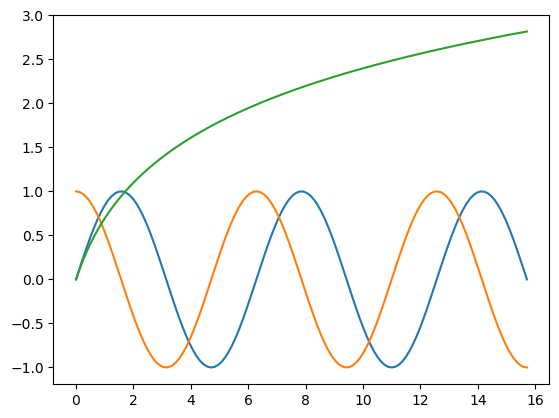

In [19]:
pp.plot(x, sinx)
pp.plot(x, np.cos(x))
pp.plot(x, np.log(1.0 + x))

To see which is which, we add labels, and request a legend.

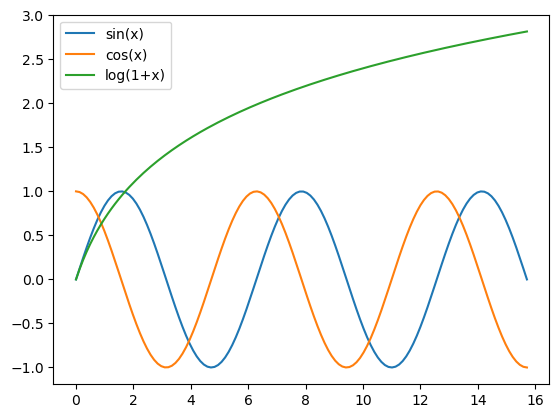

In [20]:
pp.plot(x, sinx, label='sin(x)')
pp.plot(x, np.cos(x), label='cos(x)')
pp.plot(x, np.log(1 + x), label='log(1+x)')

pp.legend()

There are many more options in matplotlib regarding the style of the lines and the formatting of the plot. We'll see more in the rest of this course, and you can look up many examples and docs online.

We can also perform operations that involve more than one array. Everything goes smoothly if we match array shapes.

In [21]:
cosx = np.cos(x)

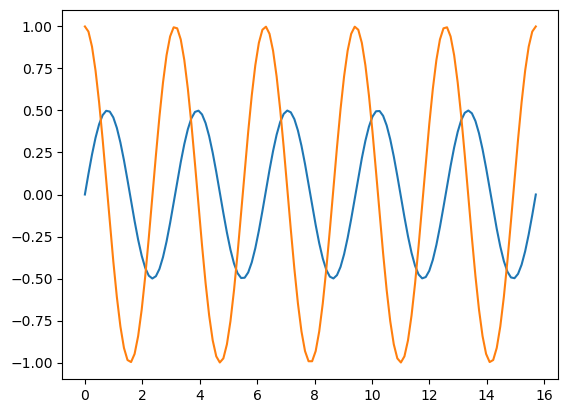

In [22]:
y = sinx * cosx
z = cosx**2 - sinx**2  # the power operator in Python is **, not ^  

pp.plot(x, y)
pp.plot(x, z)

By contrast, operations between arrays of different shapes generally fail.

In [23]:
x + y[16:32]

ValueError: operands could not be broadcast together with shapes (128,) (16,) 

There is one important exception, which is known as _broadcasting_. When it can, NumPy tries to make sense of operations between arrays of different _dimensions_.

The simplest case, which is rather intuitive, is adding a single number to an entire array, which adds it to every element. (So the addition of the number is _broadcast_ through the array.)

In [24]:
w = sinx + 1.5

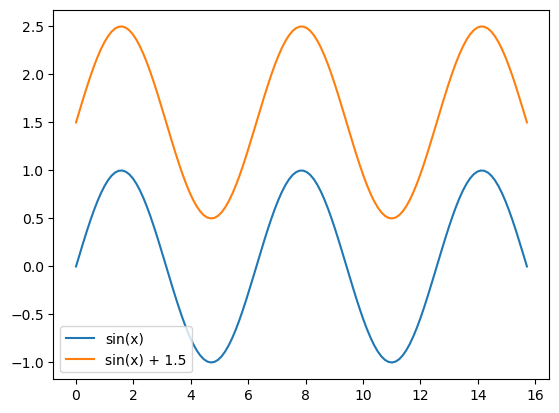

In [25]:
pp.plot(x, sinx, label='sin(x)')
pp.plot(x, w, label='sin(x) + 1.5')
pp.legend()

To make an example in two dimensions, we'll use our friend Mona Lisa:

In [26]:
monalisa_bw = np.loadtxt('monalisa.txt')

In [27]:
monalisa_bw.shape

(200, 134)

The image is 200 rows by 134 columns: I can multiply every column by a different number by making a vector of length 134. In this case NumPy matches the second dimension of the array with the single dimension of the vector, broadcasting the values along the rows.

In [53]:
xgrad = np.linspace(0.0, 1.0, 134)

In [38]:
monalisa_xgrad = monalisa_bw * xgrad

To show the figures side by side I use `matplotlib`'s subplot to make a 1-by-2 arrangement.

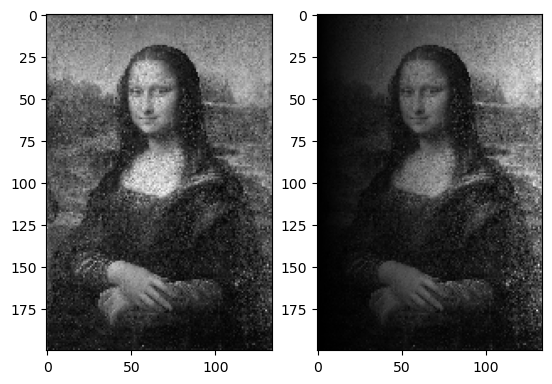

In [32]:
pp.subplot(1, 2, 1); pp.imshow(monalisa_bw, cmap='gray')
pp.subplot(1, 2, 2); pp.imshow(monalisa_xgrad, cmap='gray')

What about the other way around? If I make a vector of length 200, you'd think we could apply it _on the left_ to multiply every row by a single value.

In [62]:
ygrad = np.linspace(0.0, 1.0, 200)

In [63]:
monalisa_ygrad = ygrad * monalisa_bw

ValueError: operands could not be broadcast together with shapes (200,) (200,134) 

But that does not work. NumPy matches array shapes starting from the end, expanding missing dimensions into a size of 1, and broadcasting along all dimensions with size 1.

So we need ygrad to have shape (200, 1), which we can do with the slicing syntax and `np.newaxis`.

In [64]:
ygrad_2d = ygrad[:, np.newaxis]

In [65]:
ygrad_2d.shape

(200, 1)

Now NumPy can broadcast along the second dimension and apply the same multiplication across each row.

In [68]:
monalisa_ygrad = monalisa_bw * ygrad_2d

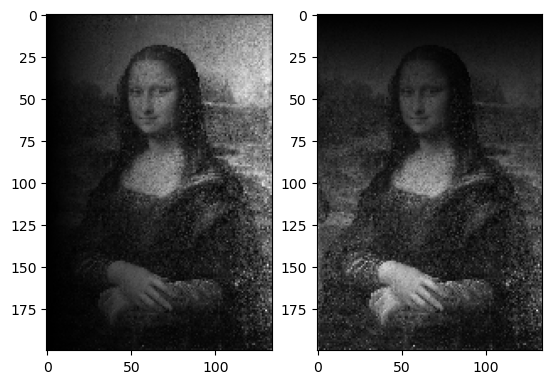

In [69]:
pp.subplot(1, 2, 1); pp.imshow(monalisa_xgrad, cmap='gray')
pp.subplot(1, 2, 2); pp.imshow(monalisa_ygrad, cmap='gray')

Since version 3.5, Python implements a special _matrix multiplication operator_ (the "at" symbol), which is put to good use by Python. In fact it means different things for different array shapes.

For two vectors of the same size, it returns the "dot" product.

In [108]:
np.array([0.0, 1.0, 2.0]) @ np.array([-1.0, -2.0, -3.0])  # same as np.dot()

-8.0

Whereas the standard multiplication sign would perform an element-by-element product:

In [109]:
np.array([0.0, 1.0, 2.0]) * np.array([-1.0, -2.0, -3.0])

array([-0., -2., -6.])

The "at" symbol can also denote a matrix-vector product

In [114]:
np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0]]) @ np.array([10.0, 20.0, 30.0])  # shapes (2,3) and (3)

array([ 80., 260.])

In [118]:
np.array([100.0, 200.0]) @ np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0]])  # shapes (2) and (2,3)

array([ 600.,  900., 1200.])

and a matrix-matrix product

In [120]:
np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0]]) @ np.array([[10.0, 20.0], [30.0, 40.0], [50.0, 60.0]])
# shapes (2,3) and (3,2)

array([[130., 160.],
       [400., 520.]])

NumPy supports many other useful operations, including manipulations to reshape and combine arrays; statistical operations; linear algebra; logical operations; sorting, searching, and counting; and fast Fourier transforms.